In [53]:
library(here)


In [54]:
source(here( "simulations", "load_and_run_r_version.R"))

In [55]:
library(grplasso)
X = outputs$Z
Y = outputs$Y

In [56]:
dim(X)
length(Y)

[1] 250   6   6

[1] 250

In [57]:
obseravation = dim(X)[1]    
predictors = dim(X)[2]
measurements = dim(X)[3]

X_matrix <- array(data = X, dim = c(obseravation, predictors * measurements))
group <- rep(1:predictors, each = measurements) # This is an example where each measurement for a predictor is considered its own group

dim(X_matrix)

[1] 250  36

In [58]:
Y_vector <- as.numeric(Y)


In [59]:
dim(Y_vector)

NULL

In [60]:
length(group)

[1] 36

In [61]:
# Print the structure of the variables
str(X_matrix)
str(Y_vector)
str(group)

# Print the first few rows of the variables
head(X_matrix)
head(Y_vector)
head(group)

 num [1:250, 1:36] 0.675 0.556 0.504 0.538 0.74 ...
 num [1:250] 6.33 7.72 5.16 6.86 7.63 ...
 int [1:36] 1 1 1 1 1 1 2 2 2 2 ...


0.6746529,-0.001400546,0.7448482,0.08761385,-2.094774,0.777363,1.3187300,0.31764522,0.8091255,0.24360522,⋯,-0.4388957,0.40754716,1.749866,0.12952780,0.6311200,-0.065401906,-0.3960271,0.20926293,0.4630716,-0.06533946
0.5562165,0.169390401,0.6826193,0.09436928,-1.758227,1.215562,1.1868533,0.69535675,0.7074230,0.20659545,⋯,-0.1965291,0.18313683,1.606035,0.63532220,0.5755624,0.097003798,-0.2062635,0.08418684,0.2963570,0.16826232
0.5040962,0.064234783,0.6144020,-0.08251542,-1.548452,1.524412,1.1097525,0.40838166,0.7071746,-0.13812282,⋯,-0.5005770,0.09098278,1.342877,0.97114845,0.5010598,0.006327966,-0.4190272,0.07567139,0.3207881,0.30996122
0.5377905,0.099369022,0.6569749,0.09766467,-1.564269,1.769026,0.9941702,0.62206500,0.6967616,0.23180538,⋯,-0.2393469,0.31097004,1.285388,1.18851078,0.5993077,0.013342145,-0.2383279,0.16212075,0.3503693,0.40592813
0.7401522,0.183505894,0.9297809,-0.03849054,-1.877436,0.942230,1.3769229,0.58394503,1.0087200,0.03963031,⋯,-0.5282024,0.72441018,1.867016,-0.01327038,0.7447669,0.138614291,-0.4760490,0.45087853,0.2537459,-0.17104912
0.6490235,-0.048975644,1.2033035,-0.07259729,-1.847226,2.263345,1.3799192,0.09989745,1.3082675,-0.08708138,⋯,-0.5638858,0.29459544,1.672475,1.64527510,0.6643527,-0.087723305,-0.5039135,0.19707046,0.3154782,0.58142802


[1] 6.327597 7.719656 5.163158 6.863079 7.629225 4.505638

[1] 1 1 1 1 1 1

In [62]:
measurements

[1] 6

In [63]:
index <- c( rep(1:predictors, each = measurements))


if(inputs$intercept > 0)
{
    index <- c(NA, rep(1:predictors, each = measurements))
    intercept_column <- rep(1, observations)
    X_matrix <- cbind(intercept_column, X_matrix)
}



In [64]:
index

[1] 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5 6 6 6 6 6 6

In [65]:
X_matrix

0.6746529,-0.001400546,0.7448482,0.087613849,-2.094774,0.7773630,1.3187300,0.31764522,0.8091255,0.243605216,⋯,-0.4388957,0.40754716,1.7498660,0.12952780,0.6311200,-0.065401906,-0.3960271,0.20926293,0.4630716,-0.06533946
0.5562165,0.169390401,0.6826193,0.094369284,-1.758227,1.2155625,1.1868533,0.69535675,0.7074230,0.206595448,⋯,-0.1965291,0.18313683,1.6060352,0.63532220,0.5755624,0.097003798,-0.2062635,0.08418684,0.2963570,0.16826232
0.5040962,0.064234783,0.6144020,-0.082515422,-1.548452,1.5244116,1.1097525,0.40838166,0.7071746,-0.138122825,⋯,-0.5005770,0.09098278,1.3428767,0.97114845,0.5010598,0.006327966,-0.4190272,0.07567139,0.3207881,0.30996122
0.5377905,0.099369022,0.6569749,0.097664673,-1.564269,1.7690260,0.9941702,0.62206500,0.6967616,0.231805378,⋯,-0.2393469,0.31097004,1.2853882,1.18851078,0.5993077,0.013342145,-0.2383279,0.16212075,0.3503693,0.40592813
0.7401522,0.183505894,0.9297809,-0.038490542,-1.877436,0.9422300,1.3769229,0.58394503,1.0087200,0.039630312,⋯,-0.5282024,0.72441018,1.8670161,-0.01327038,0.7447669,0.138614291,-0.4760490,0.45087853,0.2537459,-0.17104912
0.6490235,-0.048975644,1.2033035,-0.072597293,-1.847226,2.2633445,1.3799192,0.09989745,1.3082675,-0.087081381,⋯,-0.5638858,0.29459544,1.6724746,1.64527510,0.6643527,-0.087723305,-0.5039135,0.19707046,0.3154782,0.58142802
0.2204147,0.047713683,0.9105479,0.098512068,-1.318276,1.1509232,0.5512390,0.40869187,1.0696293,0.243033732,⋯,-0.6525968,0.32679999,0.9998920,0.75888640,0.2061606,-0.015651719,-0.5279862,0.16461926,0.3490073,0.24205480
0.7009160,0.034503851,0.9428815,0.046291247,-1.786961,1.1515428,1.4405923,0.39996096,1.0562156,0.314739520,⋯,-0.6325607,1.21959968,1.5130137,0.18175196,0.6398457,-0.031820196,-0.5381860,0.69311037,0.3659034,-0.09391313
0.5885492,0.120499781,0.8755503,0.008135980,-2.436581,1.2313759,1.1311166,0.63671372,0.9963005,0.063640515,⋯,-0.6489758,0.17907475,2.2679825,0.99568837,0.6508991,0.040927960,-0.5528115,0.08714253,0.3938652,0.37249220
0.6085150,-0.031751977,0.6624439,0.065801346,-2.025686,1.0814114,1.1622543,0.28818795,0.7330461,0.244536110,⋯,-0.1669179,0.61739054,1.6029560,0.59650521,0.5764111,-0.105300547,-0.1288903,0.33510755,0.4973486,0.16118730
0.6249930,0.063046192,0.7251074,0.015120563,-1.911857,1.1934186,1.3338539,0.55157567,0.8453742,0.083366189,⋯,-0.1459063,0.41465058,1.5684969,0.84071020,0.6386426,-0.021659343,-0.0671481,0.25851013,0.4227569,0.28826089


In [66]:
dim(X_matrix)

[1] 250  36

In [67]:
length(Y)

[1] 250

In [68]:
grpl = grplasso(x = X_matrix, y = Y_vector, index = index, lambda = 200,model = LinReg (),center=FALSE)

Lambda: 200  nr.var: 18 


In [69]:
names(grpl)

[1] "x"                 "y"                 "coefficients"     
 [4] "norms.pen"         "lambda"            "index"            
 [7] "penscale"          "model"             "ngradient"        
[10] "nloglik"           "fitted"            "linear.predictors"
[13] "fn.val"            "converged"         "weights"          
[16] "offset"            "control"           "call"

In [70]:
# Assuming your grplasso model is named 'grpl'

# Print the structure of the model object to understand what's available
print("Structure of the grplasso model object:")
str(grpl)

# Get and print the coefficients from the model
coefficients <- coef(grpl)
print("Coefficients from the grplasso model:")
print(coefficients)

# Identify and print non-zero coefficients to see which variables were selected
selected_variables <- which(coefficients != 0)
print("Indices of selected variables with non-zero coefficients:")
print(selected_variables)

# If the grplasso object contains fitted values, calculate and print R-squared
if ("fitted.values" %in% names(grpl)) {
  fitted_values <- grpl$fitted.values
  r_squared <- cor(Y, fitted_values)^2
  print("R-squared for the grplasso model:")
  print(r_squared)
}

# If you performed cross-validation and have a cv.glmnet or similar object
# cv_model <- cv.grplasso(...)
# print("Optimal lambda from cross-validation:")
# print(cv_model$lambda.min)

# Predictions on new data (if available)
# predictions <- predict(grpl, newx = X_new)
# print("Predictions on new data:")
# print(predictions)

# Diagnostic plots can be more challenging because grplasso may not provide standard methods for these
# You may need to calculate residuals and fitted values manually if they're not part of the grpl object

# Example of a residual plot if residuals are available
# if ("residuals" %in% names(grpl)) {
#   print("Residuals plot:")
#   plot(grpl$fitted.values, grpl$residuals)
#   abline(h = 0, col = "red")
# }

# More detailed analysis might be necessary based on the grplasso documentation and your data


[1] "Structure of the grplasso model object:"


List of 18
 $ x                : NULL
 $ y                : num [1:250] 6.33 7.72 5.16 6.86 7.63 ...
 $ coefficients     : num [1:36, 1] 0 0 0 0 0 0 0 0 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr "200"
 $ norms.pen        : num [1:6, 1] 0 0 0.92 1.92 3.21 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr "200"
 $ lambda           : num 200
 $ index            : int [1:36] 1 1 1 1 1 1 2 2 2 2 ...
 $ penscale         :function (x)  
 $ model            :Formal class 'grpl.model' [package "grplasso"] with 8 slots
  .. ..@ invlink  :function (eta)  
  .. ..@ link     :function (mu)  
  .. ..@ nloglik  :function (y, eta, weights, ...)  
  .. ..@ ngradient:function (x, y, mu, weights, ...)  
  .. ..@ nhessian :function (x, mu, weights, ...)  
  .. ..@ check    :function (y)  
  .. ..@ name     : chr "Linear Regression Model"
  .. ..@ comment  : chr "Use update.hess=\"lambda\" in grpl.control because the Hessian is constant"
 $ ngradient   

In [71]:
# Extract coefficients from the model, excluding the intercept if it was included
# Assuming the first coefficient is the intercept
predictor_coefficients <- grpl$coefficients[-1]

# Reshape the coefficients back into a matrix
# The matrix will have dimensions equal to the number of predictors x number of measurements

}
coef_matrix <- compute_matrix(predictor_coefficients, predictors, measurements)

# Now, coef_matrix contains the coefficients for each predictor at each measurement point
print("Matrix of coefficients for each predictor:")
print(coef_matrix)


ERROR: Error in parse(text = x, srcfile = src): <text>:8:1: '}' inatteso
7: 
8: }
   ^


In [ ]:
dim(X)

[1] 100   6   6

In [ ]:
compute_predictions_and_error <- function(coef_matrix, Z, Y_actual, true_predictors) {
  # Reshape coef_matrix to match the structure of Z
  reshaped_coefs <- as.vector(t(coef_matrix))
  
  # Compute predicted values
  Y_predicted <- Z %*% reshaped_coefs
  
  # Compute prediction error (MSE)
  mse <- mean((Y_actual - Y_predicted)^2)
  
  # Evaluate feature selection accuracy
  # Determine which predictors are selected by the model (non-zero coefficients)
  selected_predictors <- apply(coef_matrix, 1, function(row) any(row != 0))
  
  # Compare with true_predictors to calculate feature selection accuracy
  correct_selections <- sum(selected_predictors == true_predictors)
  total_predictors <- length(true_predictors)
  selection_accuracy <- correct_selections / total_predictors
  
  return(list(predicted = Y_predicted, mse = mse, accuracy = selection_accuracy))
}

true_predictors = inputs$true_predictors
# Example usage of the function
# Assuming true_predictors is defined as c(1,1,0,1,0,0)
results <- compute_predictions_and_error(coef_matrix, X_matrix, Y_vector, true_predictors)

# Print the results
print(paste("Prediction MSE:", results$mse))
print(paste("Feature Selection Accuracy:", results$accuracy))


[1] "Prediction MSE: 4.5866740862588"
[1] "Feature Selection Accuracy: 0.5"


In [ ]:
results$predicted[1:10]

[1]  7.335227  9.979849  4.121940  6.306377  7.400440  7.194711  8.310543
 [8]  5.174591  6.218708 10.519881

In [ ]:
Y[1:10]

[1] 5.227113 6.797777 7.406288 8.736990 6.460056 7.095361 5.368763 8.409185
 [9] 7.545539 7.605605

In [72]:
# Assuming grplasso is available in your R environment
library(grplasso)

# Define a range of lambda values to test
lambda_values <- seq(10, 8000, length.out = 1000)

# Number of folds for cross-validation
k_folds <- 5

# Initialize vectors to store the average MSE and accuracy for each lambda
average_mse <- numeric(length(lambda_values))
average_accuracy <- numeric(length(lambda_values))

# Create indices for the k-fold cross-validation
set.seed(123)  # For reproducibility
folds <- sample(cut(seq_along(Y_vector), breaks = k_folds, labels = FALSE))

# Cross-validation loop
for (i in seq_along(lambda_values)) {
  lambda <- lambda_values[i]
  fold_mse <- numeric(k_folds)
  fold_accuracy <- numeric(k_folds)

  for (fold in 1:k_folds) {
    # Split data into training and validation sets
    train_indices <- which(folds != fold)
    val_indices <- which(folds == fold)
    
    X_train <- X_matrix[train_indices, ]
    Y_train <- Y_vector[train_indices]
    X_val <- X_matrix[val_indices, ]
    Y_val <- Y_vector[val_indices]

    # Fit grplasso model on training data
    grpl <- grplasso(x = X_train, y = Y_train, index = index, lambda = lambda, model = LinReg(), center = FALSE)

    # Compute predictions, MSE, and accuracy on validation data
    coef_matrix <- matrix(grpl$coefficients, nrow = 6, ncol = 6)  # Adjust dimensions as needed
    results <- compute_predictions_and_error(coef_matrix, X_val, Y_val, true_predictors)
    fold_mse[fold] <- results$mse
    fold_accuracy[fold] <- results$accuracy
  }

  # Calculate average MSE and accuracy for this lambda
  average_mse[i] <- mean(fold_mse)
  average_accuracy[i] <- mean(fold_accuracy)

  # Print the average MSE and accuracy for this lambda
  print(paste("Lambda:", lambda, "- Average MSE:", average_mse[i], "- Average Accuracy:", average_accuracy[i]))
}

# Selecting the best lambda: prioritize accuracy but consider MSE for tie-breaking
# Find the lambda with the highest accuracy
max_accuracy <- max(average_accuracy)
candidates <- which(average_accuracy == max_accuracy)

# Among the candidates, choose the one with the lowest MSE
best_lambda_index <- candidates[which.min(average_mse[candidates])]
best_lambda <- lambda_values[best_lambda_index]

# Print the best lambda and its corresponding MSE and accuracy
print(paste("Best lambda:", best_lambda, "with an average MSE of:", average_mse[best_lambda_index], "and an average Accuracy of:", average_accuracy[best_lambda_index]))


Lambda: 10  nr.var: 36 


ERROR: Error in compute_predictions_and_error(coef_matrix, X_val, Y_val, true_predictors): non trovo la funzione "compute_predictions_and_error"


In [98]:
index

[1] 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5 6 6 6 6 6 6

In [97]:
lambda = 375
grpl = grplasso(x = X_matrix, y = Y_vector, index = index, lambda = lambda,model = LinReg (),center=FALSE)

beta_star = to_matrix_form(grpl$coefficients, predictors, basis_functions)
beta_star

Lambda: 375  nr.var: 18 


0.000000000,0.000000000,0.000000e+00,0.000000000,0.000000e+00,0.0000000000
0.000000000,0.000000000,0.000000e+00,0.000000000,0.000000e+00,0.0000000000
0.004752899,0.006952223,1.508606e-05,0.009604745,-3.193937e-05,-0.0001039628
0.678823098,1.090366097,1.700411e-01,1.172169278,7.578078e-03,-0.0047831649
0.929688035,1.628793988,-4.464255e-02,1.111686688,4.421345e-02,-0.0013695863
0.000000000,0.000000000,0.000000e+00,0.000000000,0.000000e+00,0.0000000000


In [74]:
coeff_full = grpl$coefficients
# Assume 'predictors' is the number of predictors and 'basis_functions' is the number of basis functions per predictor
# 'measurements' variable seems to represent the number of basis functions per predictor, so it will be used as 'basis_functions'


to_matrix_form <-  function(predictor_coefficients, predictors, basis_functions) {
    # Create a matrix with 'basis_functions' elements per row
    # and the number of rows equal to the number of predictors from coeff_full
    coeff_matrix = matrix(0, nrow = predictors, ncol = basis_functions)

    for (i in 1:(predictors * basis_functions)) {
        # Calculate the row index as the ceiling of the division of 'i' by 'basis_functions'
        row_index = (i - 1) %/% basis_functions + 1
        # Calculate the column index as 'i' modulo 'basis_functions'; if modulo is 0, it means it's the last measurement
        col_index = ifelse(i %% basis_functions == 0, basis_functions, i %% basis_functions)
        # Assign the value of the coefficient to the matrix
        coeff_matrix[row_index, col_index] = predictor_coefficients[i]
}

  return(coeff_matrix)
}



In [75]:

beta_star = to_matrix_form(grpl$coefficients, predictors, basis_functions)
beta_star

0.0000000,0.0000000,0.000000000,0.0000000,0.000000000,0.000000000
0.1545105,0.2348688,0.019727678,0.2541005,0.003268165,0.002275287
0.2247246,0.4006731,0.046661828,0.5509037,-0.005077165,0.002187292
0.4320736,0.8504441,0.205592169,0.9055575,0.015363752,0.008585165
1.2245053,1.9868319,0.006523203,1.4456842,0.030819070,-0.034750584
0.4710197,0.5309769,-0.037415867,0.3783595,0.080182355,-0.037302908


In [76]:
beta_matrix = outputs$B
beta_matrix

5.845675e-06,0.1111000,0.3333250,0.6299246,0.7814763,0.8414652
2.042073e-04,0.2323456,0.6976292,1.0681440,0.9830862,0.8659785
0.000000e+00,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
2.042073e-04,0.2323456,0.6976292,1.0681440,0.9830862,0.8659785
0.000000e+00,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
0.000000e+00,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


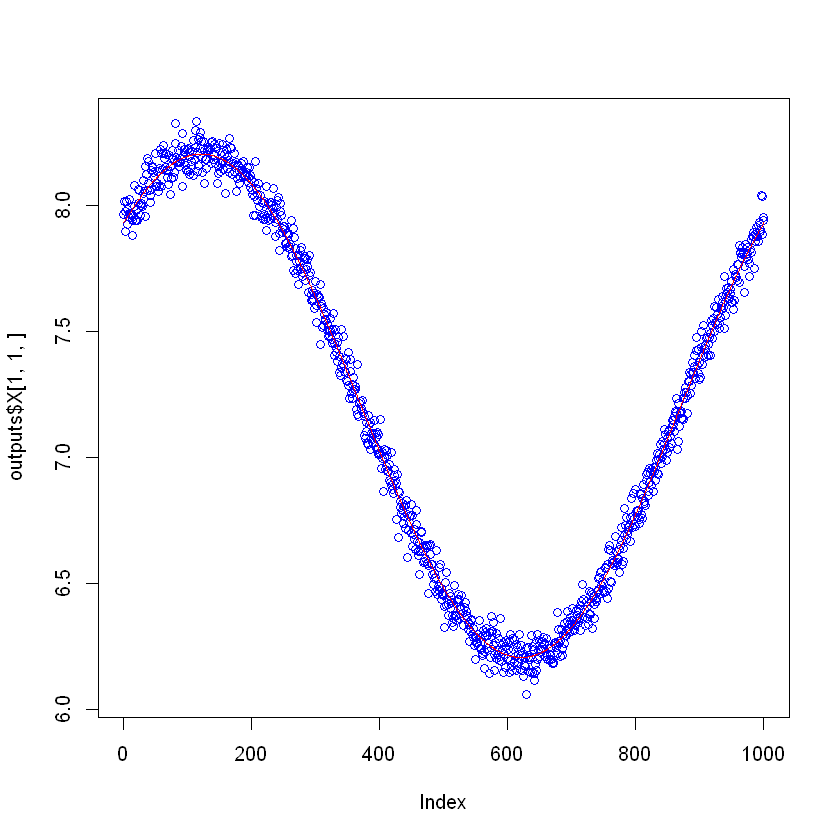

In [77]:
plot(outputs$X[1,1,], col = "blue")
# add another line in the plot
lines(outputs$U[1,1,], col = "red")


In [78]:
basis_values = outputs$basis_values
time_domains = inputs$time_domains
beta_point_values = outputs$beta_point_values

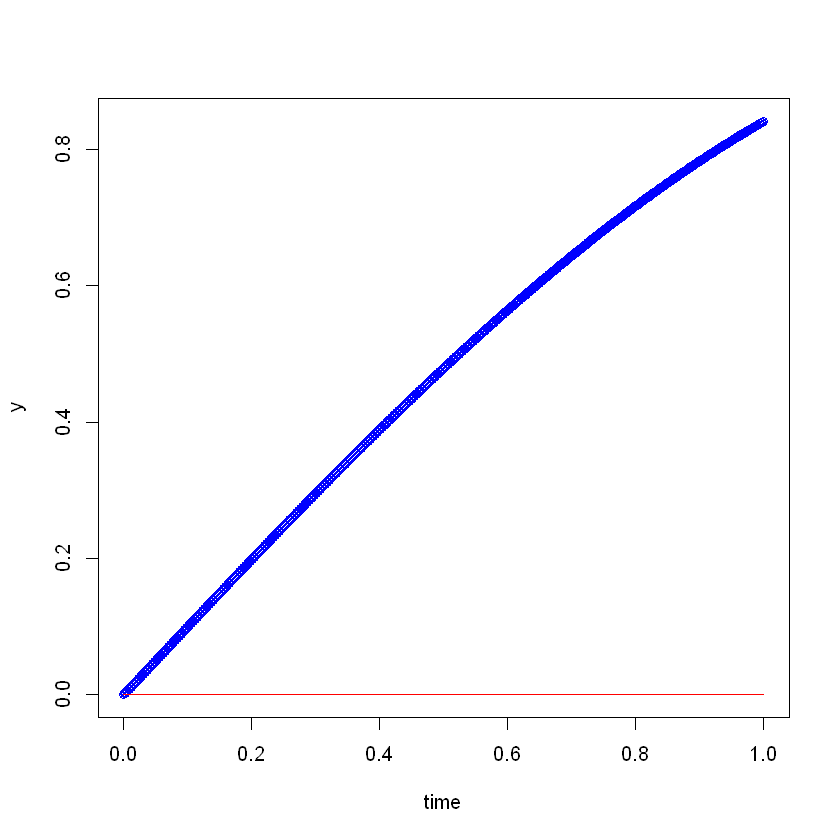

In [79]:
# plot the real coefficients vs the estimated coefficients
predictor = 1
time = unlist(time_domains[predictor])
y = beta_point_values[predictor,]
plot(time, y, col = "blue")

# add the predicted coefficients to the plot
y_pred = basis_values[predictor,,] %*% beta_star[predictor,]
lines(time, y_pred, col = "red")

In [80]:
basis = create_1_basis(5, 0:1, 4)
# generate 100 measures over the time domain
time = seq(0,1, length.out = 100)
beta_func = function(t) sin(t)
beta_func_dt = beta_func(time)
# smooth the function
coeffs = smooth_beta_function(beta_func, time, basis)
coeffs

bspl4.1       bspl4.2       bspl4.3       bspl4.4       bspl4.5 
-4.304359e-06  1.667094e-01  4.996878e-01  7.516896e-01  8.414149e-01

In [81]:
# get the basis values over the time domain
basis_vals = eval.basis(time, basis)

In [82]:
# recompute the function from the basis values and the smoother coefficients

compute_by = function(basis_vals, coeffs) {
  return(basis_vals %*% coeffs)
}

beta_func_recomputed = basis_vals %*% coeffs

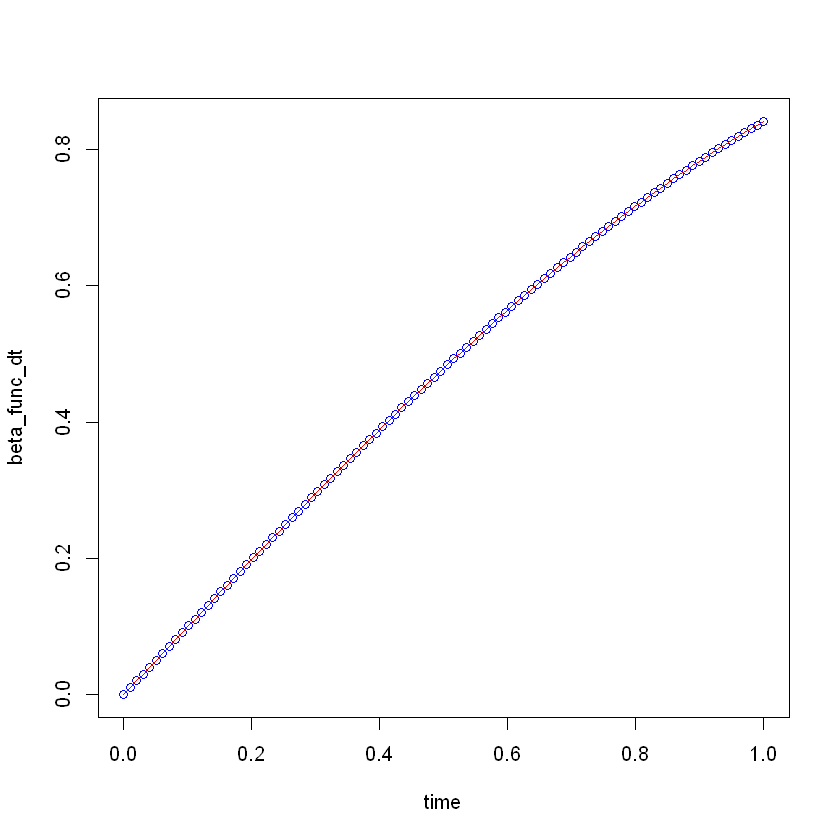

In [83]:
plot(time, beta_func_dt, col = "blue")
lines(time, beta_func_recomputed, col = "red")

In [84]:
measurements = 100
beta_funcs = list(
  function(t) {
    sin(t) 
  },
  function(t) {
    sin(2 * t)
  },
  function(t) {
     4*t
  }
)
time_domains = list(
  seq(0,1, length.out = measurements),
  seq(0, pi / 3, length.out = measurements),
  seq(-1, 1, length.out = measurements)
)


mu_funcs = list(
    function(t,args) {
        cos(2 * pi * (t - args$a1)) + args$a2
    },
    function(t,args) {
        args$b1 * sin(pi * t) + args$b2
    },
    function(t,args) {
        args$c1 * t^3 + args$c2 * t^2 + args$c3 * t
    }
)

In [85]:
n_basis_functions = 5 
order = 4
# generate basis for both the beta functions
# basis_f1 = create_1_basis(n_basis_functions, time_domains[[1]], order)
# basis_f2 = create_1_basis(n_basis_functions, time_domains[[2]], order)
# basis_f3 = create_1_basis(n_basis_functions, time_domains[[3]], order)

# basis_objs = list(basis_f1, basis_f2,basis_f3)
basis_objs = create_basis(n_basis_functions, time_domains, order,length(beta_funcs))

In [86]:
smooth_betas_generic_xx <- function(beta_funcs,num_basis, time_domains, basis_objs) {
  
  num_predictors <- length(beta_funcs)
  measurements <- length(time_domains[[1]])
  # Initialize a matrix to store the smoothed beta coefficients
  beta_matrix <-  array(0, dim = c(num_predictors,num_basis))
  beta_point_values <-  array(0, dim = c(num_predictors, measurements))
  basis_values <-  array(0, dim = c(num_predictors,measurements,num_basis))
  for (i in 1:num_predictors) {
    beta_func <- beta_funcs[[i]]
    basis_obj <- basis_objs[[i]]
    time <- time_domains[[i]]

    beta_values <- beta_func(time)
    if(length(beta_values) == 1){ # if beta is a 0
      beta_values <- rep(0, length(time))
    }
    beta_point_values[i,] <- beta_values
    basis_values[i,,] <- eval.basis(time, basis_obj)
    fdPar_obj <- fda::fdPar(basis_obj)
    smoothed_beta <- fda::smooth.basis(time, beta_values, fdPar_obj)
    beta_matrix[i,] <- smoothed_beta$fd$coefs
  }
  return(list(beta_matrix = beta_matrix, beta_point_values = beta_point_values, basis_values = basis_values))

}

In [87]:
result_xx= smooth_betas_generic_xx(beta_funcs, n_basis_functions, time_domains, basis_objs)
beta_coeff_matrix_xx = result_xx$beta_matrix
beta_point_values_xx = result_xx$beta_point_values
beta_basis_values_xx = result_xx$basis_values

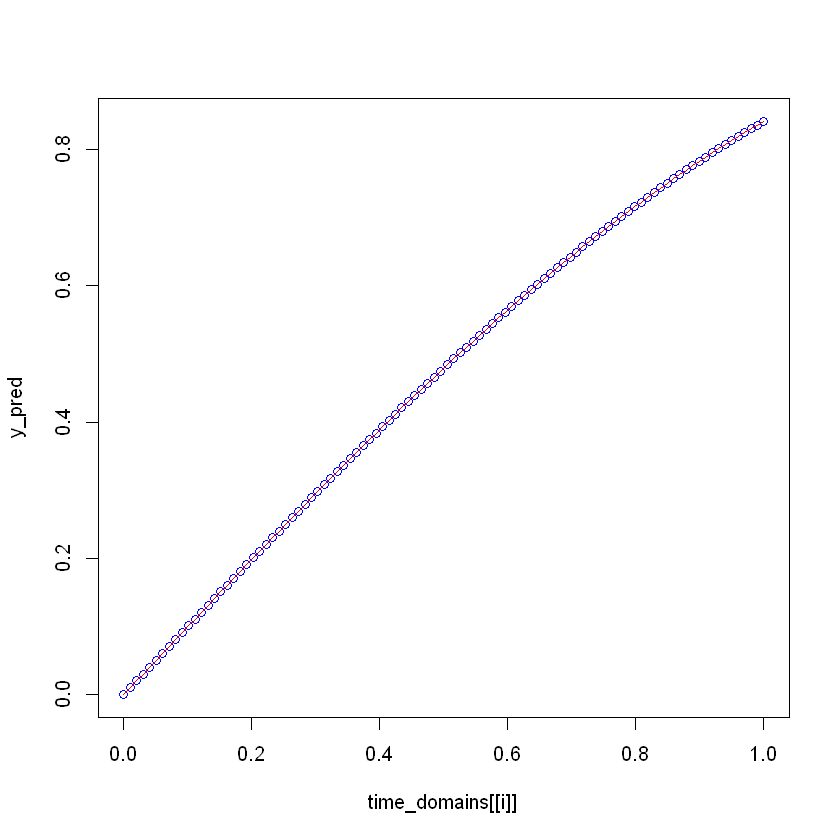

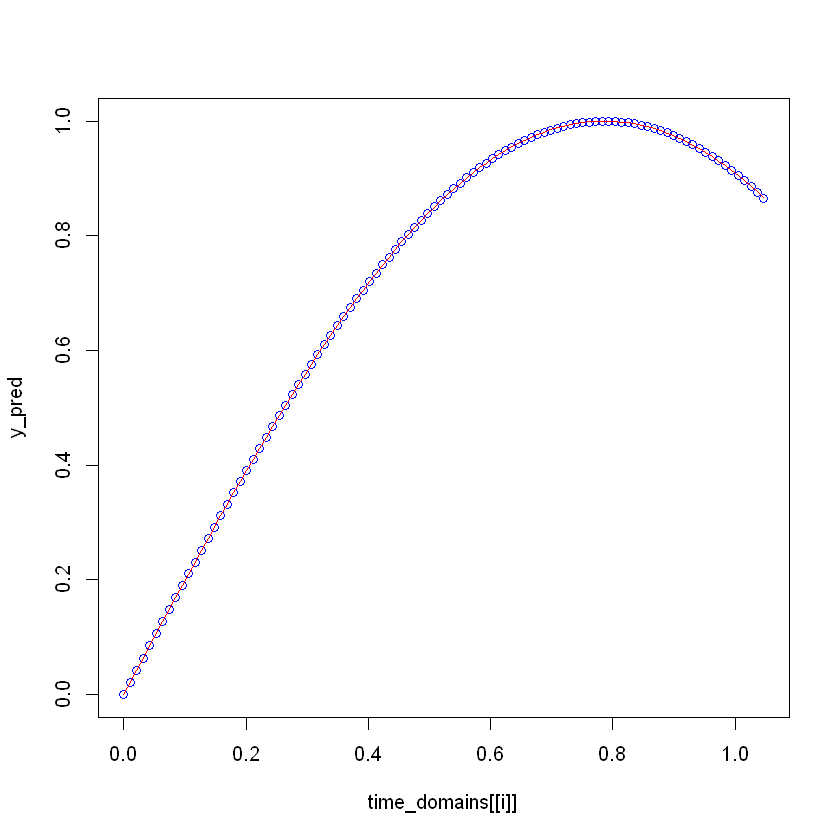

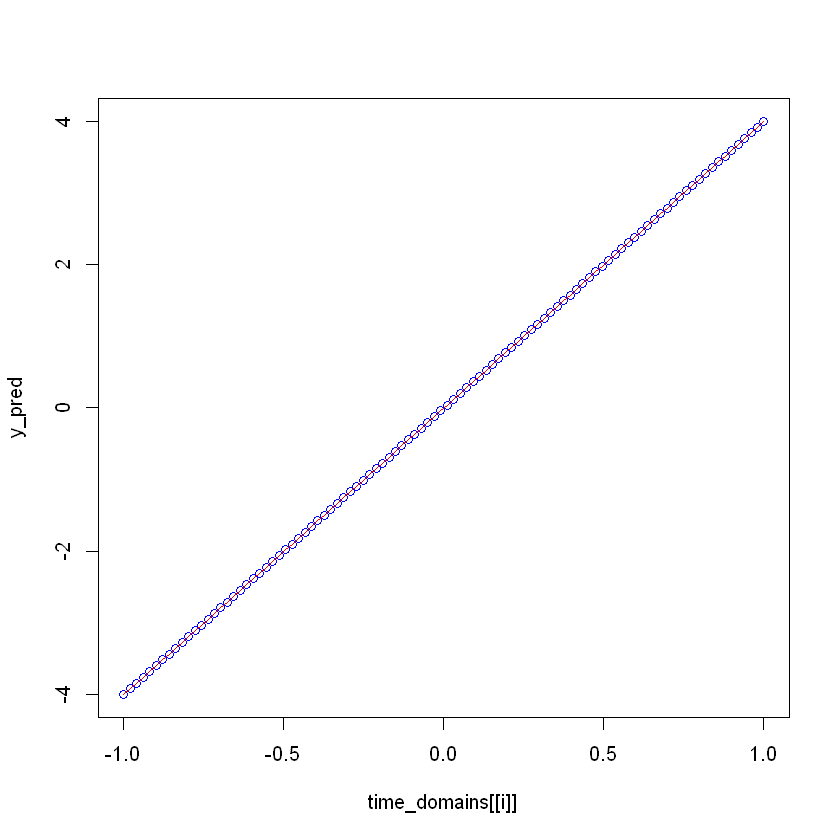

In [88]:
for(i in 1:length(beta_funcs)){
  y_pred=compute_by(beta_basis_values_xx[i,,],beta_coeff_matrix_xx[i,])
  y_true = beta_funcs[[i]](time_domains[[i]])
  plot(time_domains[[i]], y_pred, col = "blue")
  lines(time_domains[[i]], y_true, col = "red")
  
}




# plot(time, beta_func_dt, col = "blue")
# lines(time, beta_func_recomputed, col = "red")

In [89]:
observations = 200
coef_list <- list(
      '1' = list(a1 = rnorm(observations, mean = -4, sd = 3), a2 = rnorm(observations, mean = 7, sd = 1.5)),
      '2' = list(b1 = runif(observations, min = 3, max = 7), b2 = rnorm(observations, mean = 0, sd = 1)),
      '3' = list(c1 = rnorm(observations, mean = -3, sd = sqrt(1.2^2)), c2 = rnorm(observations, mean = 2, sd = sqrt(0.5^2)), c3 = rnorm(observations, mean = -2, sd = 1))
  )
U <- simulate_true_predictors_Ut(mu_funcs, observations, time_domains,coef_list) 

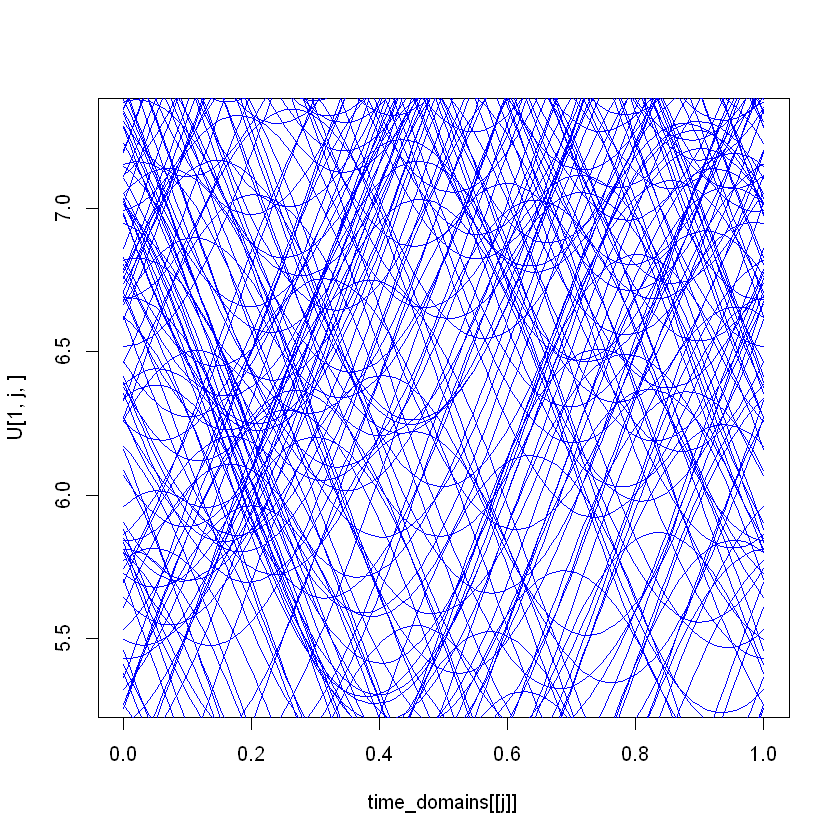

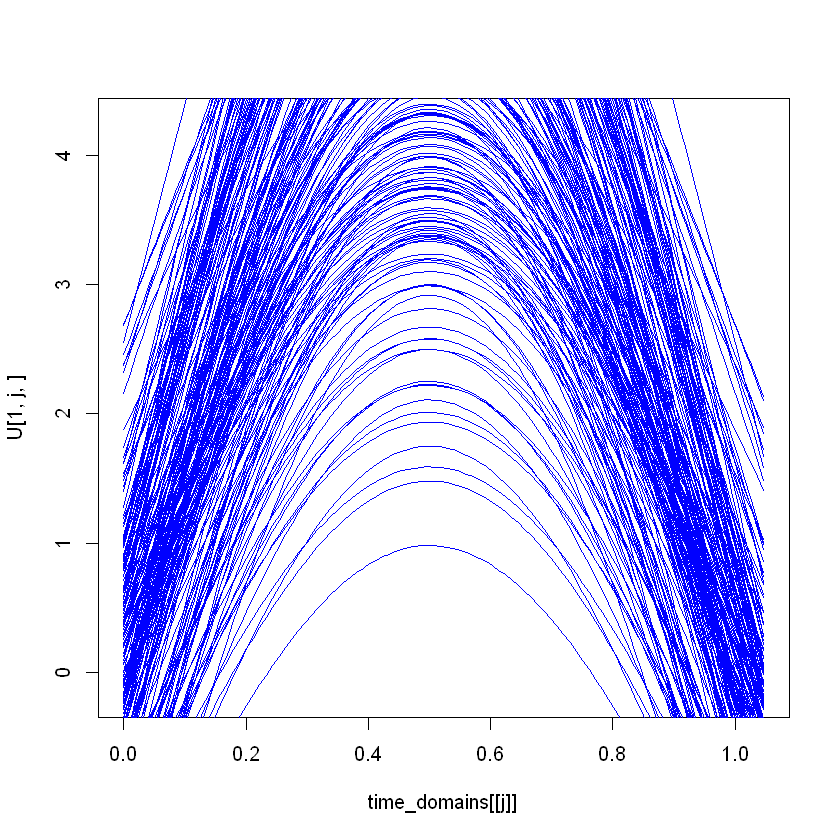

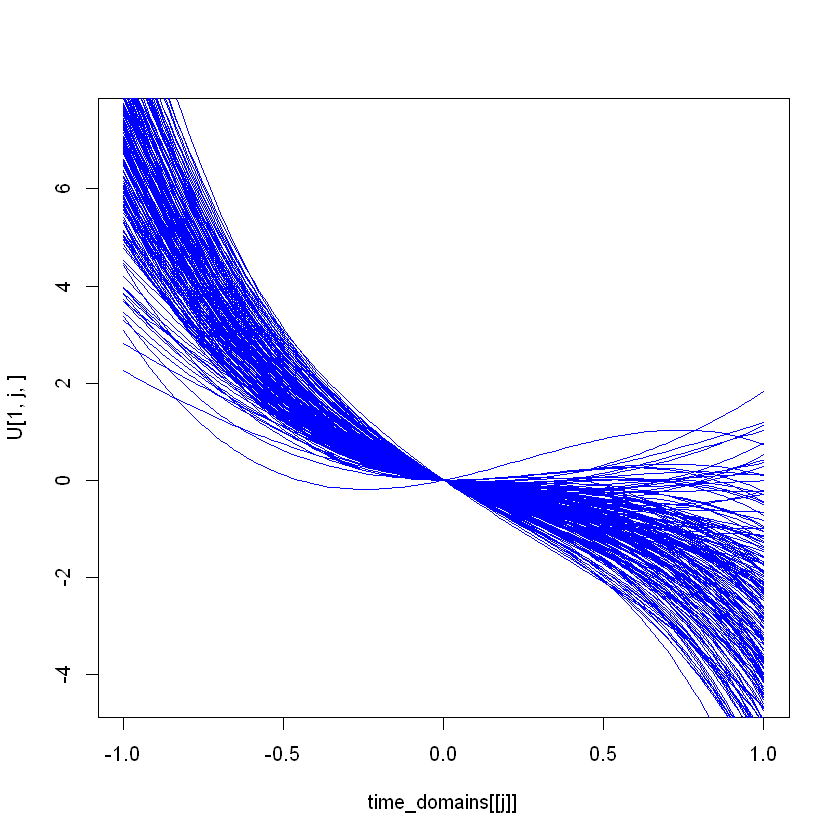

In [90]:
for(j in seq_along(beta_funcs)){
    plot(time_domains[[j]], U[1,j,], type = "n")  # Create an empty plot
    for(i in seq_len(observations)){
        lines(time_domains[[j]], U[i,j,], col = "blue")  # Add lines for each observation
    }
}

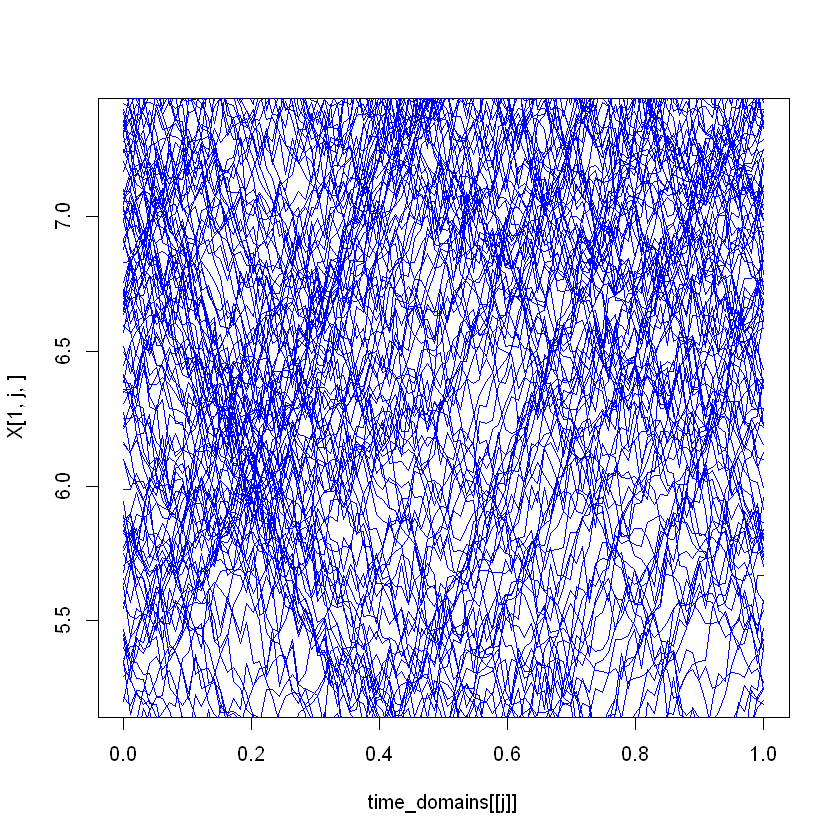

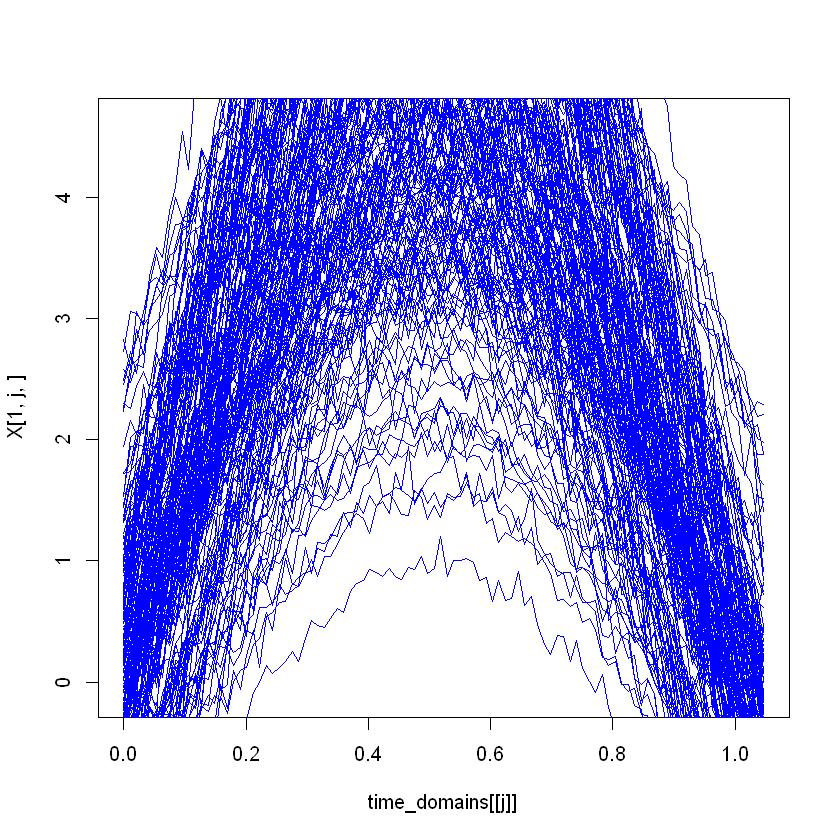

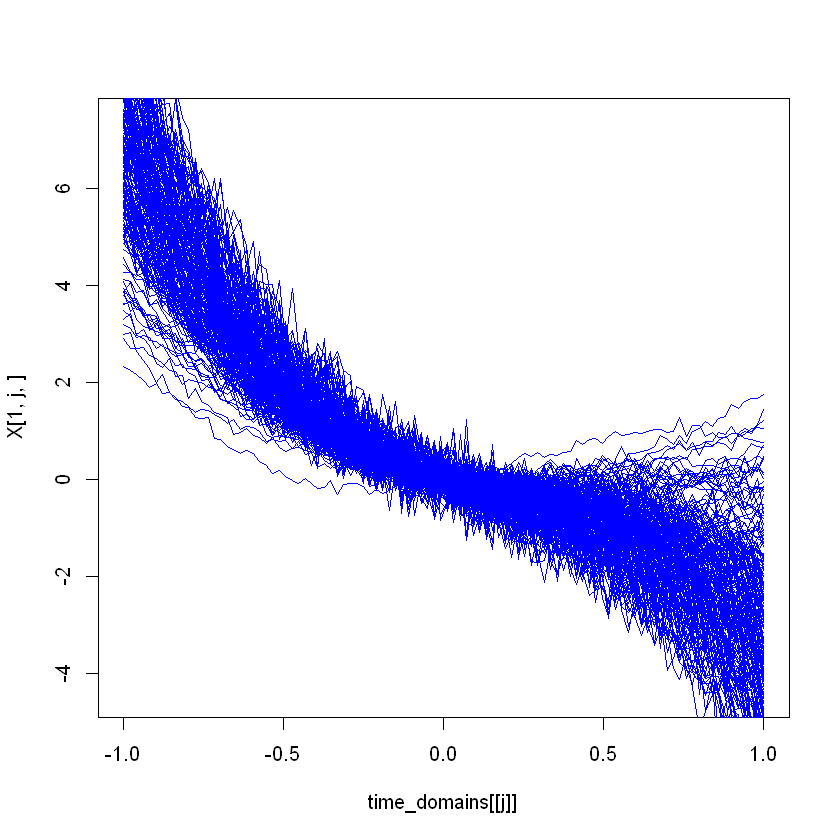

In [91]:
X <- simulate_observations_Xt(U)
for(j in seq_along(beta_funcs)){
    plot(time_domains[[j]], X[1,j,], type = "n")  # Create an empty plot
    for(i in seq_len(observations)){
        lines(time_domains[[j]], X[i,j,], col = "blue")  # Add lines for each observation
    }
}

In [92]:
Y <- compute_Y_values(mu_funcs, beta_funcs, observations, length(mu_funcs), time_domains,intercept,coef_list)$Y

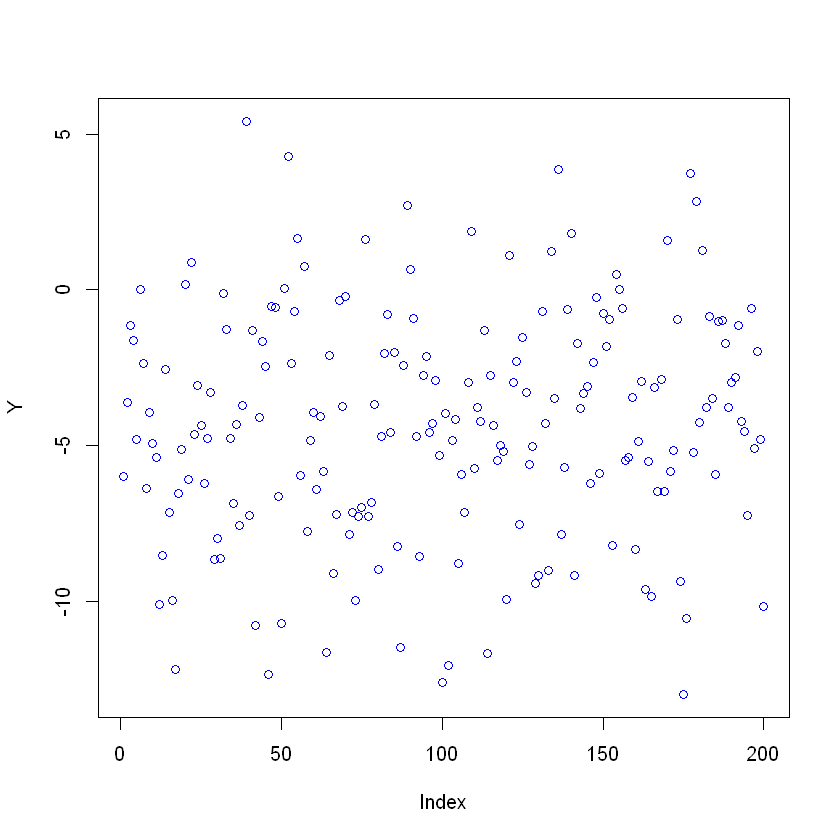

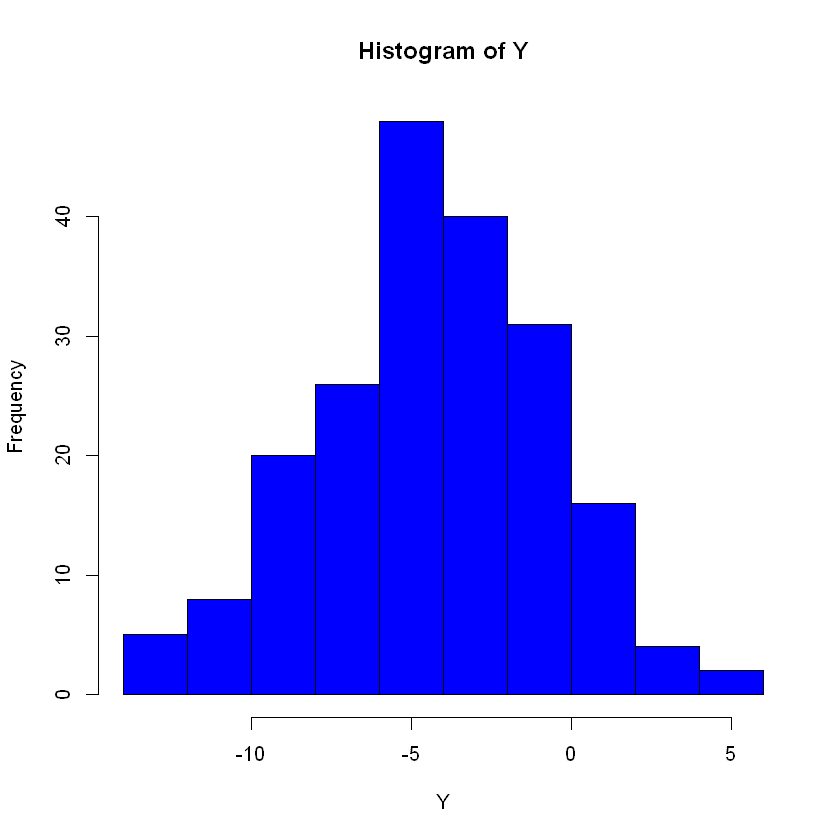

In [93]:
plot(Y, col = "blue")
hist(Y, col = "blue")
